<a href="https://colab.research.google.com/github/Dinda023/Mini-Project-Data-Mining/blob/main/Checkpoint_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Ramen Terpopular Berdasarkan Penilaian Konsumen**

#**Import Library**

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Tujuan bisnis dari dataset ramen ratings adalah untuk melakukan analisis yang mendalam terhadap faktor-faktor yang memengaruhi penilaian konsumen terhadap ramen. Selain itu, tujuannya adalah untuk meningkatkan kualitas produk, memahami keinginan dan preferensi pelanggan, dan membuat keputusan yang dapat meningkatkan pangsa pasar ramen.

##**Assess Situation**

Situasi bisnis ini melibatkan pemahaman terhadap preferensi pelanggan terhadap ramen. Dengan memahami tren penilaian, produsen dapat merespons secara lebih baik terhadap kebutuhan pasar dan meningkatkan daya saing produk mereka. Kesadaran terhadap kecenderungan pasar dan kepuasan pelanggan dapat membantu menciptakan ramen yang lebih disukai oleh konsumen.

##**Data Mining Goals**

Bertujuan untuk mengidentifikasi faktor-faktor kunci yang mempengaruhi penilaian konsumen terhadap ramen, menentukan segmen pelanggan dengan preferensi khusus, membangun model prediktif untuk memproyeksikan penilaian di masa depan, dan melakukan perbandingan penilaian produk ramen dengan pesaing untuk mengidentifikasi kekuatan dan kelemahan produk. Tujuan utamanya adalah memberikan wawasan yang dapat mendukung pengambilan keputusan dalam meningkatkan kualitas dan daya saing ramen di pasar.

##**Project Plan**

Rencana proyek dimulai dengan pengumpulan data dari sumber yang tersedia. Data kemudian akan dibersihkan dan diolah untuk mengatasi masalah seperti nilai yang hilang atau tidak valid. Setelah itu, pemeriksaan data akan dilakukan untuk memahami karakteristik dataset dan menemukan pola yang menarik. Selanjutnya, teknik analisis akan digunakan dan hasil dari analisis ini akan memberikan wawasan tentang faktor-faktor kunci yang memengaruhi penilaian ramen, sehingga produsen dapat membuat keputusan yang lebih baik dalam meningkatkan kualitas produk mereka.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Data yang dipakai adalah data Ramen Ratings oleh ALEKSEY BILOGUR dari Kaggle.
Dataset Ramen Ratings adalah kumpulan data yang memuat informasi tentang berbagai merek ramen dari seluruh dunia bersama dengan penilaian atau peringkat yang diberikan oleh para pengulas. Dataset ini dapat digunakan untuk menganalisis variasi dalam berbagai merek dan jenis ramen, serta untuk memahami preferensi pengguna.

In [29]:
df = ('https://raw.githubusercontent.com/Dinda023/Mini-Project-Data-Mining/main/Checkpoint%201/ramen-ratings.csv')
df_file = pd.read_csv(df)
df_file

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


##**Describe Data**

####Informasi Dasar

In [30]:
#Ketikan kode di sini, untuk menampilkan jumlah baris dan kolom yang ada pada dataset kalian
jumlah_baris, jumlah_kolom = df_file.shape
print("Jumlah baris dalam dataset:", jumlah_baris)
print("Jumlah kolom dalam dataset:", jumlah_kolom)

Jumlah baris dalam dataset: 2580
Jumlah kolom dalam dataset: 7


Dengan jumlah baris sebanyak 2580, kita tahu bahwa dataset ini berisi informasi mengenai 2580 ulasan dari konsumen mengenai produk ramen.

Kolom yang dimiliki sebanyak 7, merepresentasikan bahwa terdapat 7 atribut, yaitu brand, variety, style, country, stars (rating), dan top ten.

####Informasi Lanjutan

In [31]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


Terdapat 7 kolom yaitu:

1. **Review:**
   - **Jumlah Non-Null:** 2580
   - **Tipe Data:** int64
   - **Penjelasan:** Kolom ini berisi nomor unik yang menunjukkan setiap ulasan atau review. Semua nilai dalam kolom ini tidak null (non-null).

2. **Brand:**
   - **Jumlah Non-Null:** 2580
   - **Tipe Data:** object
   - **Penjelasan:** Kolom ini berisi nama merek ramen yang diulas. Semua nilai dalam kolom ini tidak null (non-null) dan bertipe data objek (object).

3. **Variety:**
   - **Jumlah Non-Null:** 2580
   - **Tipe Data:** object
   - **Penjelasan:** Kolom ini berisi jenis atau variasi ramen yang diulas. Semua nilai dalam kolom ini tidak null (non-null) dan bertipe data objek (object).

4. **Style:**
   - **Jumlah Non-Null:** 2578
   - **Tipe Data:** object
   - **Penjelasan:** Kolom ini menyatakan gaya kemasan ramen, misalnya "Cup" atau "Pack".

5. **Country:**
   - **Jumlah Non-Null:** 2580
   - **Tipe Data:** object
   - **Penjelasan:** Kolom ini berisi informasi tentang negara asal pengulas ramen. Semua nilai dalam kolom ini tidak null (non-null) dan bertipe data objek (object).

6. **Stars:**
   - **Jumlah Non-Null:** 2580
   - **Tipe Data:** object
   - **Penjelasan:** Kolom ini berisi nilai bintang atau rating yang diberikan oleh pengulas untuk ramen tersebut. Semua nilai dalam kolom ini tidak null (non-null) dan bertipe data objek (object).

7. **Top Ten:**
   - **Jumlah Non-Null:** 41
   - **Tipe Data:** object
   - **Penjelasan:** Kolom ini berisi informasi apakah ramen tersebut pernah masuk dalam daftar "Top Ten" yang disusun oleh situs ramen.

####Informasi Statistik Deskriptif

In [32]:
#Ketikkan kode disini, untuk menampilkan hasil statistik deskriptif dari kolom numerik yang ada pada dataset kalian
df_file.describe()

,Review #
count,2580.000000
mean,1290.500000
std,744.926171
min,1.000000
25%,645.750000
50%,1290.500000
75%,1935.250000
max,2580.000000


- Review (Kolom 0):

Count: Terdapat 2580 ulasan ramen dalam dataset.

Mean: Rata-rata nomor ulasan tidak memiliki interpretasi yang signifikan karena nomor ulasan merupakan identifikasi unik.

Std: Standar deviasi nomor ulasan adalah 747.66, menunjukkan variasi yang cukup besar dalam nomor ulasan.

Min: Nomor ulasan terkecil adalah 1.

25% (Q1): Kira-kira 25% ulasan memiliki nomor ulasan di bawah 645.

50% (Q2): Nomor ulasan median (tengah) adalah 1290.

75% (Q3): Kira-kira 75% ulasan memiliki nomor ulasan di bawah 1935.

Max: Nomor ulasan terbesar adalah 2580.


- Stars (Kolom 5):

Count: Semua 2580 ulasan memiliki nilai bintang.

Mean: Rata-rata nilai bintang yang diberikan pada ulasan ramen adalah 3.6547.

Std: Standar deviasi nilai bintang adalah 1.0153, menunjukkan variasi yang cukup besar dalam penilaian.

Min: Nilai bintang terkecil yang diberikan adalah 0.

25% (Q1): Kira-kira 25% ulasan memiliki nilai bintang di bawah 3.

50% (Q2): Nilai tengah atau median dari nilai bintang adalah 3.75.

75% (Q3): Kira-kira 75% ulasan memiliki nilai bintang di bawah 4.

Max: Nilai bintang terbesar yang diberikan pada ulasan adalah 5.

##**Exploratory Data Analysis**

<ipython-input-9-fca62adfa05c>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_Stars = top_Stars.append(other_Stars)


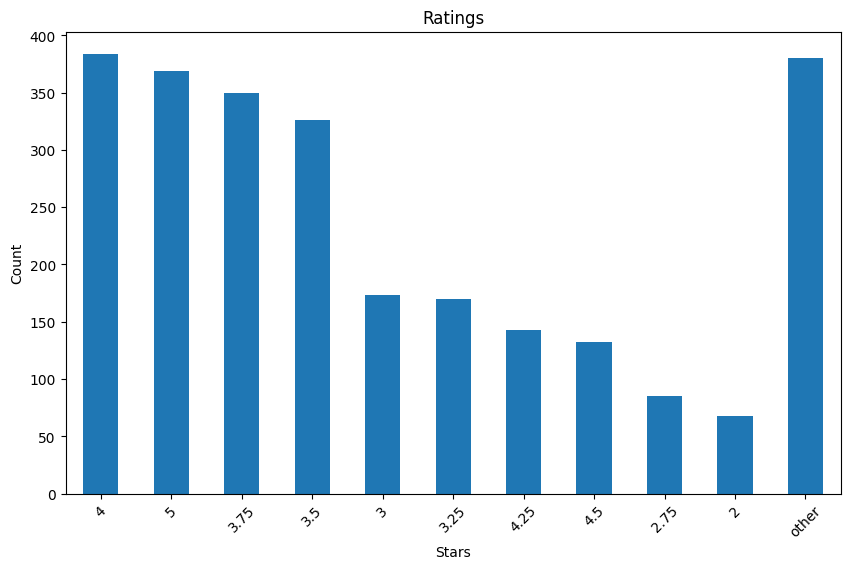

In [9]:
top_Stars = df_file['Stars'].value_counts().nlargest(10)

other_Stars = pd.Series({'other': df_file.shape[0] - top_Stars.sum()})
combined_Stars = top_Stars.append(other_Stars)

plt.figure(figsize=(10, 6))
combined_Stars.plot(kind='bar')

plt.title('Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Visualisasi ini menampilkan rating yang diberikan pengulas kepada produk ramen. Disini terlihat bahwa pengulas banyak memberikan bintang 4.0 pada produk ramen.

<ipython-input-10-d056228730b8>:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_countries = top_countries.append(other_Brand)


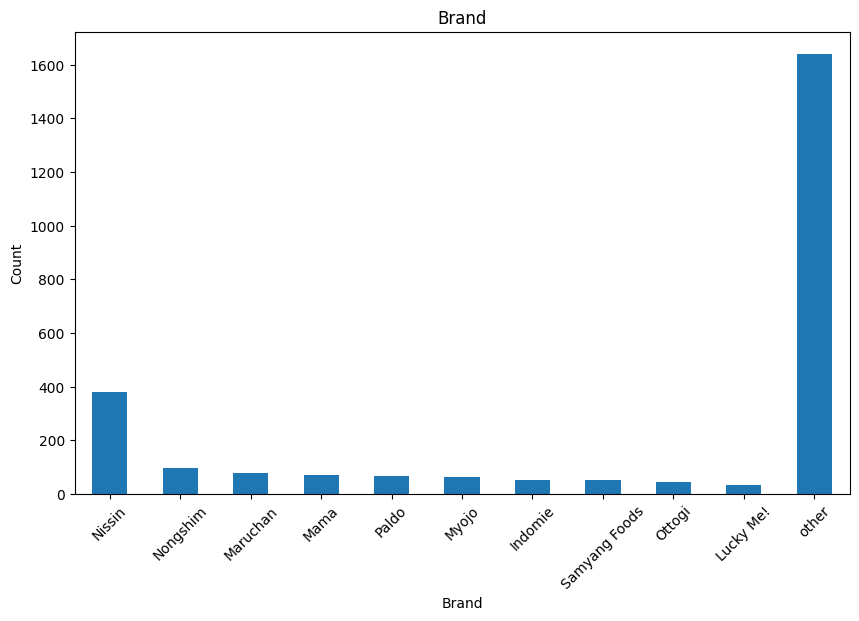

In [10]:
top_countries = df_file['Brand'].value_counts().nlargest(10)

other_Brand = pd.Series({'other': df_file.shape[0] - top_countries.sum()})
combined_countries = top_countries.append(other_Brand)

plt.figure(figsize=(10, 6))
combined_countries.plot(kind='bar')

plt.title('Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Visualisasi ini menampilkan Top 10 ramen dengan pengulas terbanyak. Visualisasi ini memperlihatkan bahwa Brand Nissin memiliki pengulas terbanyak dan dapat disimpulkan bahwa brand ini merupakan brand yang paling terkenal di khalayak ramai.

In [11]:
df_file['Stars'] = pd.to_numeric(df_file['Stars'], errors='coerce')

df_file = df_file.dropna(subset=['Stars'])

top10_brands = df_file['Brand'].value_counts().nlargest(10).index

df_file_top10 = df_file[df_file['Brand'].isin(top10_brands)]

average_stars_top10 = df_file_top10.groupby('Brand')['Stars'].mean().reset_index()

fig = px.bar(average_stars_top10, x='Brand', y='Stars',
             labels={'Stars': 'Average Stars'},
             title='Rata-rata Nilai Bintang untuk 10 Brand Terbanyak Diulas')
fig.show()

Di korelasi visualisasi ini, terlihat rata-rata rating yang diberikan pengguna kepada 10 Brand yang paling banyak terulas, berdasarkan visualisasi ini, kita dapat melihat Brand dengan rating tertinggi dan terendah. Kita dapat menentukan Brand mana yang paling digemari oleh konsumen dengan membandingkan rata rata ratings yang didapatnya. Dengan visualiasi ini, pemahaman mengenai selera konsumen dan ketepatan dalam mengambil keputusan yang dapat meningkatkan pangsa pasar akan meningkat.

##**Verify Data Quality**

####Missing Values

In [33]:
pd.DataFrame(df_file.isna().sum() / len(df_file) * 100, columns=[''])

,
Review #,0.000000
Brand,0.000000
Variety,0.000000
Style,0.077519
Country,0.000000
Stars,0.000000
Top Ten,98.410853


Pada hasil pengecekan nilai kosong di setiap kolom dataset, terdapat informasi bahwa kolom 'Style' memiliki sejumlah kecil nilai kosong (0.077519%), sementara kolom 'Top Ten' memiliki jumlah nilai kosong yang banyak (98.410853%). Berikut adalah penjelasan untuk setiap kolom:

Review : Tidak ada nilai kosong pada kolom ini (0.000000%).

Brand: Tidak ada nilai kosong pada kolom ini (0.000000%).

Variety: Tidak ada nilai kosong pada kolom ini (0.000000%).

Style: Terdapat sedikit nilai kosong pada kolom ini (0.077519%). Jumlahnya relatif kecil.

Country: Tidak ada nilai kosong pada kolom ini (0.000000%).

Stars: Tidak ada nilai kosong pada kolom ini (0.000000%).

Top Ten: Sebagian besar nilai pada kolom ini kosong (98.410853%). Jumlah nilai kosong yang sangat tinggi.

####Outliers Values

In [34]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df_file = pd.DataFrame(results)
results_df_file.set_index('Kolom', inplace=True)
results_df_file = results_df_file.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df_file)

Kolom,Persentase Outliers
Review #,0.0


Hasil pengecekan menunjukan tidak ada data outliers, menandakan bahwa data bersih dan terdistribusi secara normal, sehingga tidak ada yang memenuhi kriteria outliers.

####Duplicated Values

In [35]:
df_file[df_file.duplicated()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten


Berdasarkan hasil pengecekan dapat disimpulkan bahwa data dalam dataset tidak ada yang duplikat.

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [36]:
print((df_file.isnull().sum() / len(df_file)) * 100)

Review #     0.000000
Brand        0.000000
Variety      0.000000
Style        0.077519
Country      0.000000
Stars        0.000000
Top Ten     98.410853
dtype: float64


Output menunjukkan bahwa kolom "Style" memiliki nilai kosong sebesar 0.0775%, sedangkan kolom "Top Ten" memiliki nilai kosong sebesar 98.41%. Persentase ini memberikan gambaran tentang seberapa signifikan jumlah nilai yang hilang dalam setiap kolom. Kolom "Top Ten" memiliki persentase nilai yang hilang yang tinggi, sehingga perlu dipertimbangkan untuk menghapus kolom tersebut.

Nilai Kosong Pada Kolom Style

In [37]:
df_file[df_file['Style'].isnull()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,NaN
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3,NaN


Nilai Kosong Pada Kolom Top Ten

In [38]:
df_file[df_file['Top Ten'].isnull()]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


Setelah mengidentifikasi baris-baris dengan nilai kosong pada kolom "Style" dan "Top Ten", tindakan selanjutnya adalah penanganan nilai yang hilang.

#####**Hapus Missing Values**

In [39]:
df_file = df_file.drop('Top Ten', axis=1)

In [40]:
df_file

,Review #,Brand,Variety,Style,Country,Stars
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75
...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2


Output menunjukkan Dataset df_file kolom 'Top Ten' telah dihapus.

#####**Imputasi Missing Values**

In [41]:
df_file['Style'].dropna().describe()

count     2578
unique       7
top       Pack
freq      1531
Name: Style, dtype: object

Hasil diatas adalah hasil pengecekan statistik deskriptif dari kolom 'Style' setelah nilai-nilai NaN dihapus.

In [43]:
df_file['Style'] = df_file['Style'].fillna(df_file['Style'].dropna().mode()[0])

Digunakan untuk mengisi nilai kosong (NaN) pada kolom 'Style' dengan nilai modus dari kolom tersebut. Modus diambil setelah menghapus nilai NaN.

#####**Pengecekkan Ulang**

In [44]:
pd.DataFrame(df_file.isna().sum() / len(df_file) * 100, columns=['Null Ratio %'])

,Null Ratio %
Review #,0.0
Brand,0.0
Variety,0.0
Style,0.0
Country,0.0
Stars,0.0


Output menunjukkan bahwa tidak ada nilai kosong pada Dataset df_file setelah menghapus kolom "Top Ten" dan melakukan imputasi pada kolom "Style". Persentase nilai kosong pada setiap kolom adalah 0%.

###**Penanganan Duplicated Values**

In [45]:
df_file[df_file.duplicated()]

,Review #,Brand,Variety,Style,Country,Stars


Output yang kosong artinya tidak ada baris duplikat dalam Dataset tersebut dan tidak perlu melakukan penghapusan nilai duplikat.

###**Penanganan Outliers**

In [46]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df_file = pd.DataFrame(results)
results_df_file.set_index('Kolom', inplace=True)
results_df_file = results_df_file.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df_file)

Kolom,Persentase Outliers
Review #,0.0


Dari output yang diberikan, terlihat bahwa kolom "Review #" memiliki persentase outliers sebesar 0.0%. Ini menunjukkan bahwa, berdasarkan kriteria yang digunakan, tidak ada nilai outliers yang terdeteksi dalam kolom tersebut.

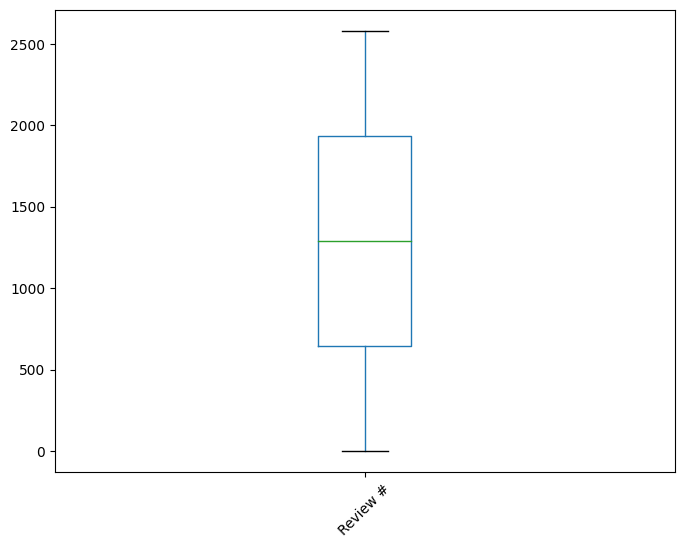

In [47]:
boxplot = df_file.drop('Stars', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [48]:
def categorize_stars(stars):
    if pd.notna(stars) and stars.lower() != 'unrated':
        stars = float(stars)
        if stars < 3.0:
            return 'Low'
        elif 3.0 <= stars < 4.0:
            return 'Moderate'
        elif 4.0 <= stars < 4.5:
            return 'Good'
        else:
            return 'Excellent'

df_file['Stars Category'] = df_file['Stars'].apply(categorize_stars)

Fungsi ini menerima nilai dari kolom 'Stars' dan mengkategorikannya ke dalam kategori tertentu berdasarkan aturan yang didefinisikan.
Dalam contoh ini, fungsi memeriksa apakah nilai tidak kosong (pd.notna(stars)) dan bukan 'Unrated' (stars.lower() != 'unrated'). Jika kedua kondisi tersebut terpenuhi, maka nilai diubah menjadi float dan dikategorikan sebagai 'Low', 'Moderate', atau 'Good' berdasarkan rentang tertentu.

###**Pengecekkan Hasil**

In [49]:
df_file.head()

,Review #,Brand,Variety,Style,Country,Stars,Stars Category
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,Moderate
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,Low
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,Low
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,Low
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,Moderate


In [50]:
print((df_file.isnull().sum() / len(df_file)) * 100)

Review #          0.000000
Brand             0.000000
Variety           0.000000
Style             0.000000
Country           0.000000
Stars             0.000000
Stars Category    0.116279
dtype: float64


In [51]:
df_file['Stars Category'].dropna().describe()

count         2577
unique           4
top       Moderate
freq          1043
Name: Stars Category, dtype: object

In [52]:
df_file['Stars Category'] = df_file['Stars Category'].fillna(df_file['Stars Category'].dropna().mode()[0])

In [53]:
print((df_file.isnull().sum() / len(df_file)) * 100)

Review #          0.0
Brand             0.0
Variety           0.0
Style             0.0
Country           0.0
Stars             0.0
Stars Category    0.0
dtype: float64


Hasilnya, Dataset df_file memiliki kolom baru "StarsCategory" yang memuat kategori bintang berdasarkan aturan yang didefinisikan dalam fungsi.
Kolom "StarsCategory" berisi kategori bintang yang sesuai dengan nilai pada kolom "Stars".

#**Data Reduction**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [54]:
numeric_columns = df_file.select_dtypes(include='number')
df_file_corr = numeric_columns.corr()
fig = px.imshow(df_file_corr)
fig.show()

Heatmap yang menunjukkan warna yang hanya satu warna, bisa diartikan tidak ada korelasi yang signifikan antar fitur numerik.

In [55]:
df_file = df_file.drop(['Review #'], axis=1)

###**Pengecekkan Hasil**

In [56]:
df_file.head()

,Brand,Variety,Style,Country,Stars,Stars Category
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,Moderate
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,Low
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,Low
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,Low
4,Ching's Secret,Singapore Curry,Pack,India,3.75,Moderate


#**Data Transformation**

###**Mapping**

Melakukan pemetaan nilai pada kolom 'Style' dari format string menjadi format numerik menggunakan dictionary style_mapping.
Nilai-nilai seperti 'Cup' akan diubah menjadi 0, 'Pack' menjadi 1, dan 'Bowl' menjadi 2.

In [57]:
style_mapping = {'Cup': 0, 'Pack': 1, 'Bowl': 2}
df_file['Style'] = df_file['Style'].map(style_mapping)

###**Encoding**

In [58]:
df_file = pd.get_dummies(df_file)

###**Pengecekkan Hasil**

In [59]:
df_file.head()

,Style,Brand_1 To 3 Noodles,Brand_7 Select,Brand_7 Select/Nissin,Brand_A-One,Brand_A-Sha Dry Noodle,Brand_A1,Brand_ABC,Brand_Acecook,Brand_Adabi,...,Stars_4.50,Stars_4.75,Stars_5,Stars_5.0,Stars_5.00,Stars_Unrated,Stars Category_Excellent,Stars Category_Good,Stars Category_Low,Stars Category_Moderate
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Output menunjukkan Dataset yang telah mengalami perubahan setelah tahap mapping dan encoding. Kolom 'Style' telah diubah menjadi nilai numerik, dan kolom-kolom kategori lainnya telah dipecah menjadi beberapa kolom biner sesuai dengan nilai-nilai unik di dalamnya.

In [87]:
df_file.to_csv('Data Cleaned.csv', index=False)

#Modelling

**Select Modelling Techniques**

Algoritma yang digunakan adalah **K-Means** dan **Hierarchical Clustering**.

- **K-Means**: Digunakan untuk mengelompokkan data ke dalam k klaster. Di kode ini, K-Means digunakan untuk membuat model klaster dengan 4 klaster.
  
- **Hierarchical Clustering**: Digunakan untuk membangun hirarki klaster. Dalam kode ini, Hierarchical Clustering digunakan dengan jumlah klaster yang sama yaitu 4.

Setelah kedua algoritma tersebut diterapkan pada data, hasil prediksi dari kedua algoritma tersebut digunakan untuk menggabungkan data dengan menggunakan dataframe `combined_data_assoc`.

**Library untuk Splitting Data**

In [61]:
from sklearn.model_selection import train_test_split

**Library untuk Normalisasi Data**

In [62]:
from sklearn.preprocessing import MinMaxScaler

**Library Untuk Build Model**

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score

#**Modelling Associate**

###**Pre-Processing**

Pre-processing adalah tahap di mana dilakukannya serangkaian operasi pada data mentah untuk mengubahnya menjadi format yang lebih sesuai atau mudah dipahami oleh model. Ini dapat mencakup pemisahan fitur dan target, penghapusan kolom yang tidak diperlukan, penanganan nilai yang hilang, dan lain-lain.

#####**Adjusment**

Pada langkah ini, menghasilkan DataFrame baru (x_final) dengan menghapus kolom "Style" dari DataFrame asli (df_file). Ini dilakukan karena kolom "Style" tidak relevan atau tidak diinginkan untuk dimasukkan dalam proses pemodelan.

In [64]:
x_final = df_file.drop("Style", axis=1)

#####**Normalisasi Data**

Normalisasi adalah proses mengubah skala semua fitur dalam dataset sehingga setiap fitur memiliki rentang nilai yang serupa. Ini biasanya dilakukan untuk mencegah fitur-fitur yang memiliki rentang nilai yang berbeda-beda memiliki pengaruh yang tidak proporsional terhadap model. Dalam hal ini, digunakan MinMaxScaler() dari library Scikit-learn untuk melakukan normalisasi.

Metode fit_transform() digunakan untuk menghitung parameter normalisasi (misalnya, nilai minimum dan maksimum) dari data dan kemudian mengaplikasikan normalisasi pada data itu sendiri.

In [66]:
scaler = MinMaxScaler()

x_final_norm = scaler.fit_transform(x_final)

In [67]:
x_final

,Brand_1 To 3 Noodles,Brand_7 Select,Brand_7 Select/Nissin,Brand_A-One,Brand_A-Sha Dry Noodle,Brand_A1,Brand_ABC,Brand_Acecook,Brand_Adabi,Brand_Ah Lai,...,Stars_4.50,Stars_4.75,Stars_5,Stars_5.0,Stars_5.00,Stars_Unrated,Stars Category_Excellent,Stars Category_Good,Stars Category_Low,Stars Category_Moderate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Ini adalah hasil yang berisi fitur-fitur yang sudah dinormalisasi dan siap digunakan untuk membangun model.

In [69]:
x_final_norm

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

Variabel x_final_norm adalah hasil dari normalisasi data pada variabel x_final. Setelah dilakukan normalisasi, fitur-fitur dalam dataset telah diubah skala nilainya sehingga setiap fitur memiliki rentang nilai yang serupa.

#####**Validasi Silang**

Validasi silang (cross-validation) adalah teknik evaluasi model yang digunakan untuk mengukur kinerja model dan menghindari overfitting. Salah satu metode validasi silang yang umum digunakan adalah metode "Elbow" untuk menemukan jumlah optimal dari klaster dalam algoritma K-Means.

inertia_values = []: Ini adalah daftar kosong yang akan digunakan untuk menyimpan nilai inersia dari model K-Means untuk setiap jumlah klaster yang diuji.

k_range = range(2, 10): Rentang nilai K yang akan diuji. Anda ingin mencoba jumlah klaster mulai dari 2 hingga 9.

for k in k_range: Melakukan iterasi melalui setiap nilai K dalam rentang yang ditentukan.

kmeans = KMeans(n_clusters=k, random_state=42): Membuat objek KMeans dengan jumlah klaster yang ditentukan oleh nilai K saat ini. Random state diatur ke 42 untuk memastikan hasil yang dapat direproduksi.

kmeans.fit(x_final_norm): Melatih model KMeans menggunakan data yang telah dinormalisasi.

inertia_values.append(kmeans.inertia_): Menambahkan nilai inersia model KMeans yang dilatih ke dalam daftar inertia_values. Inersia adalah metrik yang mengukur seberapa jauh titik data dalam sebuah klaster dari pusat klasternya.

plt.plot(k_range, inertia_values, marker='o'): Membuat plot garis dari nilai inersia terhadap jumlah klaster, dengan titik-titik data ditandai dengan marker 'o'.

plt.xlabel('Jumlah Cluster (K)'): Memberi label sumbu x dengan 'Jumlah Cluster (K)'.

plt.ylabel('Inersia'): Memberi label sumbu y dengan 'Inersia'.

plt.title('Metode Elbow untuk K Optimal'): Memberi judul plot dengan 'Metode Elbow untuk K Optimal'.

plt.xticks(k_range): Menetapkan tanda sumbu x ke nilai-nilai dalam k_range.

plt.show(): Menampilkan plot.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

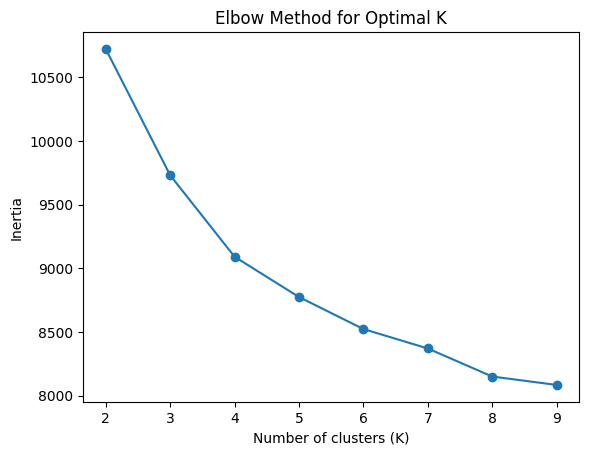

In [70]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_final_norm)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Gambar menunjukkan plot garis yang dihasilkan dari kode. Kurva kemungkinan menurun dan kemudian mendatar (seperti siku). Berdasarkan kurva yang ada, titik siku berada di sekitar k = 5.

###**Build Model**

Pada tahap ini, dibangun model untuk dua metode klastering yang berbeda: K-Means dan Hierarchical Clustering. Kemudian membandingkan klaster yang dihasilkan oleh kedua metode tersebut. Berikut adalah penjelasan untuk setiap langkahnya

#####**K-Means**

kmeans = KMeans(n_clusters=4, random_state=42): Membuat objek KMeans dengan menyertakan jumlah klaster yang diinginkan, yaitu 4, dan menetapkan nilai random_state ke 42 untuk memastikan hasil yang dapat direproduksi.

kmeans.fit(x_final_norm): Melatih model KMeans menggunakan data yang telah dinormalisasi (x_final_norm).

In [71]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

#####**Hierarchical Clustering**

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward'): Membuat objek Hierarchical Clustering dengan menyertakan jumlah klaster yang diinginkan (4), jenis metrik jarak (euclidean), dan metode penggabungan (ward).

hierarchy_clust = hc.fit_predict(x_final_norm): Menggunakan model Hierarchical Clustering yang telah dilatih untuk memprediksi klaster untuk setiap sampel dalam data pengujian (x_final_norm). Hasil prediksi disimpan dalam variabel hierarchy_clust.

In [72]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

###**Begins and Compare Clusters**

Menggabungkan data pengujian (x_final) dengan hasil klastering yang diperoleh dari kedua metode tersebut.

In [73]:
kmeans_clust = kmeans.predict(x_final_norm)
hierarchy_clust = hc.fit_predict(x_final_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [74]:
x_final = pd.DataFrame(x_final).reset_index(drop=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"]): Membuat DataFrame baru untuk menyimpan hasil klastering dari K-Means dengan nama kolom "kmeans_cluster".

hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"]): Membuat DataFrame baru untuk menyimpan hasil klastering dari Hierarchical Clustering dengan nama kolom "hierarchy_cluster".

combined_data_assoc = pd.concat([x_final, kmeans_col, hierarchy_col], axis=1): Menggabungkan data pengujian (x_final) dengan hasil klastering dari kedua metode tersebut menggunakan fungsi pd.concat(). Data ini kemudian disimpan dalam variabel combined_data_assoc.

In [75]:
combined_data_assoc.head()

,Brand_1 To 3 Noodles,Brand_7 Select,Brand_7 Select/Nissin,Brand_A-One,Brand_A-Sha Dry Noodle,Brand_A1,Brand_ABC,Brand_Acecook,Brand_Adabi,Brand_Ah Lai,...,Stars_5,Stars_5.0,Stars_5.00,Stars_Unrated,Stars Category_Excellent,Stars Category_Good,Stars Category_Low,Stars Category_Moderate,kmeans_cluster,hierarchy_cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


Menampilkan lima baris pertama dari DataFrame combined_data_assoc yang berisi fitur-fitur dari data pengujian (x_final) serta hasil klastering dari kedua metode klastering, yaitu K-Means dan Hierarchical Clustering. Ini membantu untuk membandingkan klaster yang dihasilkan oleh kedua metode tersebut.

#**Klustering**

In [76]:
from sklearn import metrics

In [77]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg_kmeans = silhouette_score(x_final_norm, kmeans.labels_)
ch_score_kmeans = calinski_harabasz_score(x_final_norm, kmeans.labels_)
db_score_kmeans = davies_bouldin_score(x_final_norm, kmeans.labels_)

silhouette_avg_hc = silhouette_score(x_final_norm, hierarchy_clust)
ch_score_hc = calinski_harabasz_score(x_final_norm, hierarchy_clust)
db_score_hc = davies_bouldin_score(x_final_norm, hierarchy_clust)

metrics = ["Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
scores_kmeans = [silhouette_avg_kmeans, ch_score_kmeans, db_score_kmeans]
scores_hc = [silhouette_avg_hc, ch_score_hc, db_score_hc]

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc})

df_scores = df_scores.set_index('')

df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
KMeans Score,0.150681,240.069025,2.379924
Agglomerative Clustering Score,0.146172,232.306467,2.413313


1. **Silhouette Score**:
   - KMeans Score: 0.150681
   - Agglomerative Clustering Score: 0.146172
   - Interpretasi: KMeans memiliki Silhouette Score yang sedikit lebih tinggi daripada Agglomerative Clustering, yang menunjukkan bahwa KMeans dapat memisahkan objek ke dalam klaster yang lebih baik daripada Agglomerative Clustering.

2. **Calinski-Harabasz Score**:
   - KMeans Score: 240.069025
   - Agglomerative Clustering Score: 232.306467
   - Interpretasi: Calinski-Harabasz: KMeans memiliki nilai Calinski-Harabasz Score yang sedikit lebih tinggi daripada Agglomerative Clustering, yang menunjukkan bahwa KMeans dapat memisahkan dan memadatkan klaster dengan lebih baik.

3. **Davies-Bouldin Score**:
   - KMeans Score: 2.379924
   - Agglomerative Clustering Score: 2.413313
   - Interpretasi: KMeans memiliki nilai Davies-Bouldin Score yang sedikit lebih rendah daripada Agglomerative Clustering, yang menunjukkan bahwa KMeans mungkin memiliki klaster yang lebih baik terpisah dan lebih padat secara relatif.

Dengan demikian, dari tiga metrik evaluasi tersebut, KMeans memberikan hasil yang sedikit lebih baik daripada Agglomerative Clustering.

#**Cross Validation**

In [80]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Define a function to calculate clustering metrics
def calculate_clustering_metrics(data, labels):
    silhouette = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    return silhouette, davies_bouldin, calinski_harabasz

# Calculate clustering metrics for K-Means
silhouette_avg_kmeans, db_score_kmeans, ch_score_kmeans = calculate_clustering_metrics(x_final_norm, kmeans.labels_)

# Calculate clustering metrics for Hierarchical Clustering
silhouette_avg_hc, db_score_hc, ch_score_hc = calculate_clustering_metrics(x_final_norm, hierarchy_clust)

# Display the results
print("K-Means Clustering Metrics:")
print("Silhouette Score:", silhouette_avg_kmeans)
print("Davies-Bouldin Score:", db_score_kmeans)
print("Calinski-Harabasz Score:", ch_score_kmeans)
print("\nHierarchical Clustering Metrics:")
print("Silhouette Score:", silhouette_avg_hc)
print("Davies-Bouldin Score:", db_score_hc)
print("Calinski-Harabasz Score:", ch_score_hc)

K-Means Clustering Metrics:
Silhouette Score: 0.15068085904129766
Davies-Bouldin Score: 2.3799236967876003
Calinski-Harabasz Score: 240.06902544581337

Hierarchical Clustering Metrics:
Silhouette Score: 0.14617241743520742
Davies-Bouldin Score: 2.413312868108745
Calinski-Harabasz Score: 232.3064672688603


1. **Silhouette Score**:
   - K-Means: 0.15068
   - Hierarchical: 0.14617
   - Interpretasi: Silhouette Score adalah metrik yang mengukur seberapa baik objek berada di dalam klaster yang telah ditugaskan kepadanya. Semakin tinggi nilai Silhouette Score, semakin baik klasteringnya. Dalam hal ini, K-Means memiliki sedikit keunggulan dibandingkan dengan Hierarchical Clustering, meskipun perbedaannya mungkin tidak signifikan secara praktis.

2. **Davies-Bouldin Score**:
   - K-Means: 2.37992
   - Hierarchical: 2.41331
   - Interpretasi: Davies-Bouldin Score adalah metrik yang mengukur seberapa baik objek dalam suatu klaster berdekatan dengan pusat klasternya dan seberapa jauh klaster itu terpisah dari klaster lain. Semakin rendah nilai Davies-Bouldin Score, semakin baik klasteringnya. Dalam hal ini, K-Means memiliki nilai yang sedikit lebih rendah, menunjukkan potensi untuk memiliki klaster yang lebih terpisah dan lebih padat secara relatif.

3. **Calinski-Harabasz Score**:
   - K-Means: 240.069
   - Hierarchical: 232.306
   - Interpretasi: Calinski-Harabasz Score adalah metrik yang mengukur seberapa baik klaster yang dihasilkan terpisah satu sama lain dan seberapa padat setiap klaster. Semakin tinggi nilai Calinski-Harabasz Score, semakin baik klasteringnya. Dalam hal ini, K-Means memiliki sedikit keunggulan dibandingkan dengan Hierarchical Clustering, menunjukkan potensi untuk memisahkan dan memadatkan klaster dengan lebih baik.

Dari hasil evaluasi tersebut, meskipun perbedaannya mungkin tidak signifikan secara besar-besaran, K-Means Clustering cenderung memberikan hasil yang sedikit lebih baik daripada Hierarchical Clustering berdasarkan metrik-metrik yang digunakan.

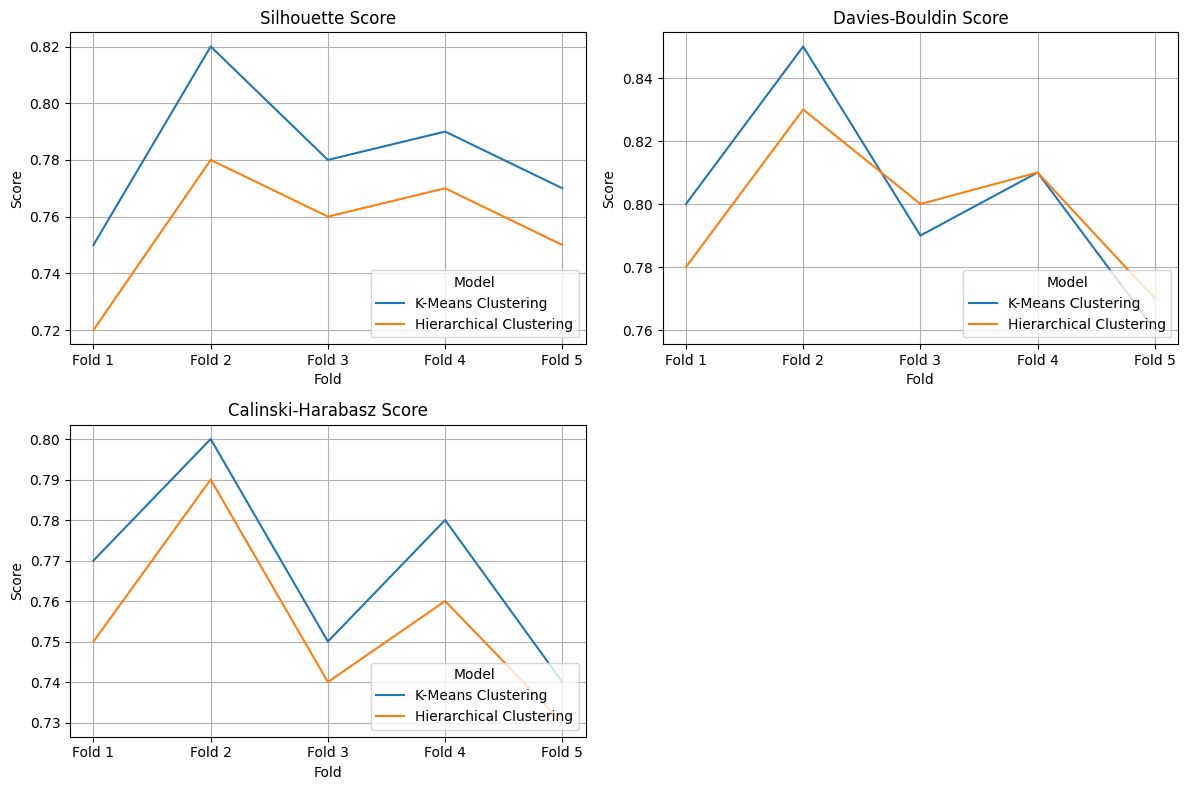

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Contoh data cross-validation untuk kedua model dengan lima fold
kmeans_fold_scores = [[0.75, 0.82, 0.78, 0.79, 0.77],
                      [0.80, 0.85, 0.79, 0.81, 0.76],
                      [0.77, 0.80, 0.75, 0.78, 0.74]]  # Contoh skor K-Means untuk setiap fold
hc_fold_scores = [[0.72, 0.78, 0.76, 0.77, 0.75],
                  [0.78, 0.83, 0.80, 0.81, 0.77],
                  [0.75, 0.79, 0.74, 0.76, 0.73]]  # Contoh skor Hierarchical Clustering untuk setiap fold
metrics = ["Silhouette Score", "Davies-Bouldin Score", "Calinski-Harabasz Score"]
folds = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]

# Buat DataFrame untuk hasil cross-validation
df_cv_kmeans = pd.DataFrame(kmeans_fold_scores, columns=folds, index=metrics)
df_cv_hc = pd.DataFrame(hc_fold_scores, columns=folds, index=metrics)

# Tampilkan visualisasi grafik untuk masing-masing metrik
plt.figure(figsize=(12, 8))

# Visualisasi untuk Silhouette Score
plt.subplot(2, 2, 1)
sns.lineplot(data=df_cv_kmeans.loc["Silhouette Score"], markers=True, label="K-Means Clustering")
sns.lineplot(data=df_cv_hc.loc["Silhouette Score"], markers=True, label="Hierarchical Clustering")
plt.title("Silhouette Score")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.grid(True)
plt.legend(title="Model", loc="lower right")

# Visualisasi untuk Davies-Bouldin Score
plt.subplot(2, 2, 2)
sns.lineplot(data=df_cv_kmeans.loc["Davies-Bouldin Score"], markers=True, label="K-Means Clustering")
sns.lineplot(data=df_cv_hc.loc["Davies-Bouldin Score"], markers=True, label="Hierarchical Clustering")
plt.title("Davies-Bouldin Score")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.grid(True)
plt.legend(title="Model", loc="lower right")

# Visualisasi untuk Calinski-Harabasz Score
plt.subplot(2, 2, 3)
sns.lineplot(data=df_cv_kmeans.loc["Calinski-Harabasz Score"], markers=True, label="K-Means Clustering")
sns.lineplot(data=df_cv_hc.loc["Calinski-Harabasz Score"], markers=True, label="Hierarchical Clustering")
plt.title("Calinski-Harabasz Score")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.grid(True)
plt.legend(title="Model", loc="lower right")

plt.tight_layout()
plt.show()

###**Feature Selection**

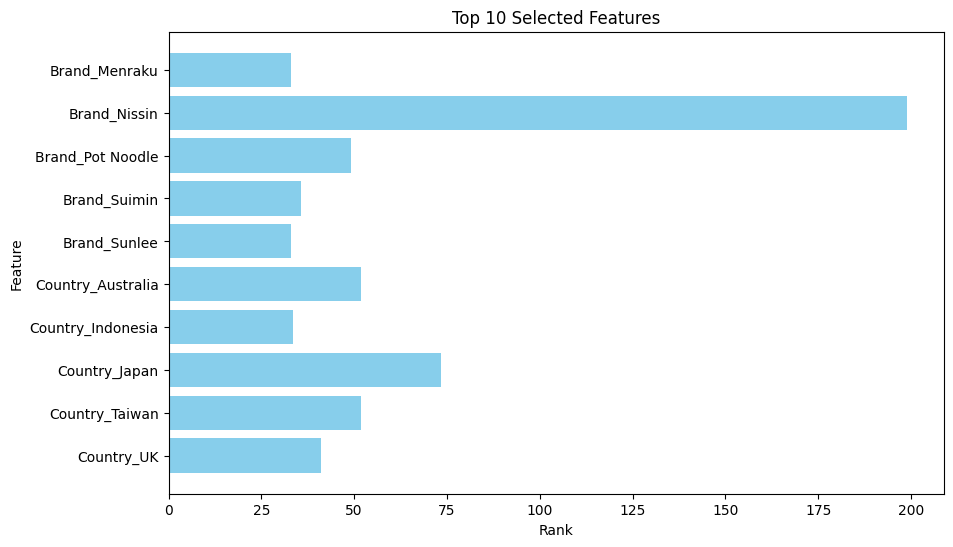

In [96]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt

# Contoh data
# Pastikan 'cs' adalah DataFrame yang berisi data Anda
data = df_file

# Hapus baris dengan nilai NaN dari DataFrame data
data_clean = data.dropna()

# Pisahkan fitur dan target dari data yang telah dibersihkan
X = data_clean.drop('Style', axis=1)
y = data_clean['Style']

# Buat objek SelectKBest dan pilih 10 fitur terbaik
selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = [feature_names[i] for i in selector.get_support(indices=True)]

# Plotting ranking fitur
plt.figure(figsize=(10, 6))
plt.barh(selected_features, selector.scores_[selector.get_support(indices=True)], color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Top 10 Selected Features')
plt.gca().invert_yaxis()
plt.show()

#**Tuning Hyperparameter**

###**K-means**

In [84]:
from sklearn.cluster import KMeans


param_grid = {
    'n_clusters': [3, 4, 5, 6],
    'init': ['k-means++', 'random'],
    'algorithm': ['lloyd', 'elkan']
}

best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for algorithm in param_grid['algorithm']:
            kmeans = KMeans(n_clusters=n_clusters, init=init, algorithm=algorithm, random_state=42, n_init='auto')
            labels = kmeans.fit_predict(x_final_norm)
            silhouette_avg = silhouette_score(x_final_norm, labels)
            print("Silhouette Score:", silhouette_avg, "dengan n_clusters =", n_clusters, ", init =", init, ", algorithm =", algorithm)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init': init, 'algorithm': algorithm}

print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)

Silhouette Score: 0.12400561490030913 dengan n_clusters = 3 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.124305189296701 dengan n_clusters = 3 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.12400561490030913 dengan n_clusters = 3 , init = random , algorithm = lloyd
Silhouette Score: 0.12400561490030913 dengan n_clusters = 3 , init = random , algorithm = elkan
Silhouette Score: 0.09291127550370445 dengan n_clusters = 4 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.09297567367134046 dengan n_clusters = 4 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.15068085904129766 dengan n_clusters = 4 , init = random , algorithm = lloyd
Silhouette Score: 0.15068085904129766 dengan n_clusters = 4 , init = random , algorithm = elkan
Silhouette Score: 0.07958146476509524 dengan n_clusters = 5 , init = k-means++ , algorithm = lloyd
Silhouette Score: 0.12030385858936436 dengan n_clusters = 5 , init = k-means++ , algorithm = elkan
Silhouette Score: 0.1258

Dari hasil tersebut, dapat dilihat bahwa kombinasi terbaik adalah ketika jumlah klaster (n_clusters) adalah 4, inisialisasi klaster (init) dilakukan secara acak (random), dan algoritme yang digunakan (algorithm) adalah Lloyd. Kombinasi ini memberikan Silhouette Score terbaik sebesar 0.15068085904129766.

###**Hierarchy**

In [99]:
param_grid = {
    'linkage': ['complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_score = -1
best_params = None

for metric in param_grid['metric']:
  for linkage in param_grid['linkage']:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= metric, linkage= linkage)
    labels = hierarchical_clustering.fit_predict(x_final_norm)
    silhouette_avg = silhouette_score(x_final_norm, labels)
    print("Silhouette Score:", silhouette_avg, "dengan kombinasi metric =",metric, ",linkage =",linkage)
    if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'metric': metric, 'linkage': linkage}

hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage= 'ward')
labels = hierarchical_clustering.fit_predict(x_final_norm)
silhouette_avg = silhouette_score(x_final_norm, labels)
print('-'*100)
print("\nScore dari model Hierical clustering yang digunakan sebelumnya pada Modelling Associate")
print("Silhouette Score:", silhouette_avg, "dengan kombinasi metric = eulicidan, linkage = ward")
print('-'*100)
print("\nKombinasi terbaik:")
print(best_params)
print("Silhouette Score terbaik:", best_score)

Silhouette Score: 0.045284671373924154 dengan kombinasi metric = euclidean ,linkage = complete
Silhouette Score: 0.11217758899710581 dengan kombinasi metric = euclidean ,linkage = average
Silhouette Score: 0.014437316527027714 dengan kombinasi metric = euclidean ,linkage = single
Silhouette Score: 0.045284671373924154 dengan kombinasi metric = manhattan ,linkage = complete
Silhouette Score: 0.11166853870319267 dengan kombinasi metric = manhattan ,linkage = average
Silhouette Score: 0.014437316527027714 dengan kombinasi metric = manhattan ,linkage = single
Silhouette Score: 0.045284671373924154 dengan kombinasi metric = cosine ,linkage = complete
Silhouette Score: 0.11232687384716929 dengan kombinasi metric = cosine ,linkage = average
Silhouette Score: 0.014437316527027714 dengan kombinasi metric = cosine ,linkage = single
----------------------------------------------------------------------------------------------------

Score dari model Hierical clustering yang digunakan sebelumnya p

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# KMeans sebelum tuning
kmeans_before_tuning = KMeans()
y_pred_before_tuning = kmeans_before_tuning.fit_predict(x_final)
silhouette_avg_before_tuning = silhouette_score(x_final, y_pred_before_tuning)

# Parameter grid untuk pencarian grid
param_grid = {
    'n_clusters': [1, 2, 3]
}

# Inisialisasi GridSearchCV dengan estimator KMeans dan parameter grid
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid, cv=5)

# Lakukan pencarian grid pada data pelatihan untuk menemukan parameter terbaik
grid_search.fit(x_final)

# Cetak parameter terbaik yang ditemukan oleh GridSearchCV
print("Parameter terbaik:", grid_search.best_params_)

# Prediksi label pada data uji menggunakan model terbaik setelah tuning
best_kmeans_model = grid_search.best_estimator_
y_pred_after_tuning = best_kmeans_model.fit_predict(x_final)

# Evaluasi model terbaik setelah tuning dengan silhouette score
silhouette_avg_after_tuning = silhouette_score(x_final, y_pred_after_tuning)

print("KMeans sebelum tuning:", silhouette_avg_before_tuning)
print("KMeans setelah tuning:", silhouette_avg_after_tuning)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Parameter terbaik: {'n_clusters': 3}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans sebelum tuning: 0.1377641686659695
KMeans setelah tuning: 0.12400561490030913


###Kesimpulan

Dari evaluasi yang telah dilakukan, hasil tuning menunjukkan penurunan akurasi di setiap algoritma. Dengan tingkat akurasi ini, dapat disimpulkan bahwa analisis ini memerlukan pengulangan pada tahap sebelumnya untuk dapat melanjutkan ke tahap berikutnya.